In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data

df = pd.read_csv(r'C:\10x AIMastery\solar-challenge-week1\data\benin-malanville.csv', 
                parse_dates=['Timestamp'])


In [17]:
# Summary stats
print("Summary Statistics:")
display(df.describe())

# Missing values
missing = df.isna().sum()
print("\nMissing Values:")
display(missing[missing > 0])

# Columns with >5% nulls
print("\nColumns with >5% nulls:")
display(missing[missing > 0.05*len(df)])

Summary Statistics:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN



Missing Values:


Comments    525600
dtype: int64


Columns with >5% nulls:


Comments    525600
dtype: int64

In [19]:
# Z-score calculation
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = stats.zscore(df[numeric_cols].dropna())
outliers = (np.abs(z_scores) > 3).any(axis=1)

print(f"Found {outliers.sum()} outliers (|Z|>3)")

# Handle missing data
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

Found 7740 outliers (|Z|>3)


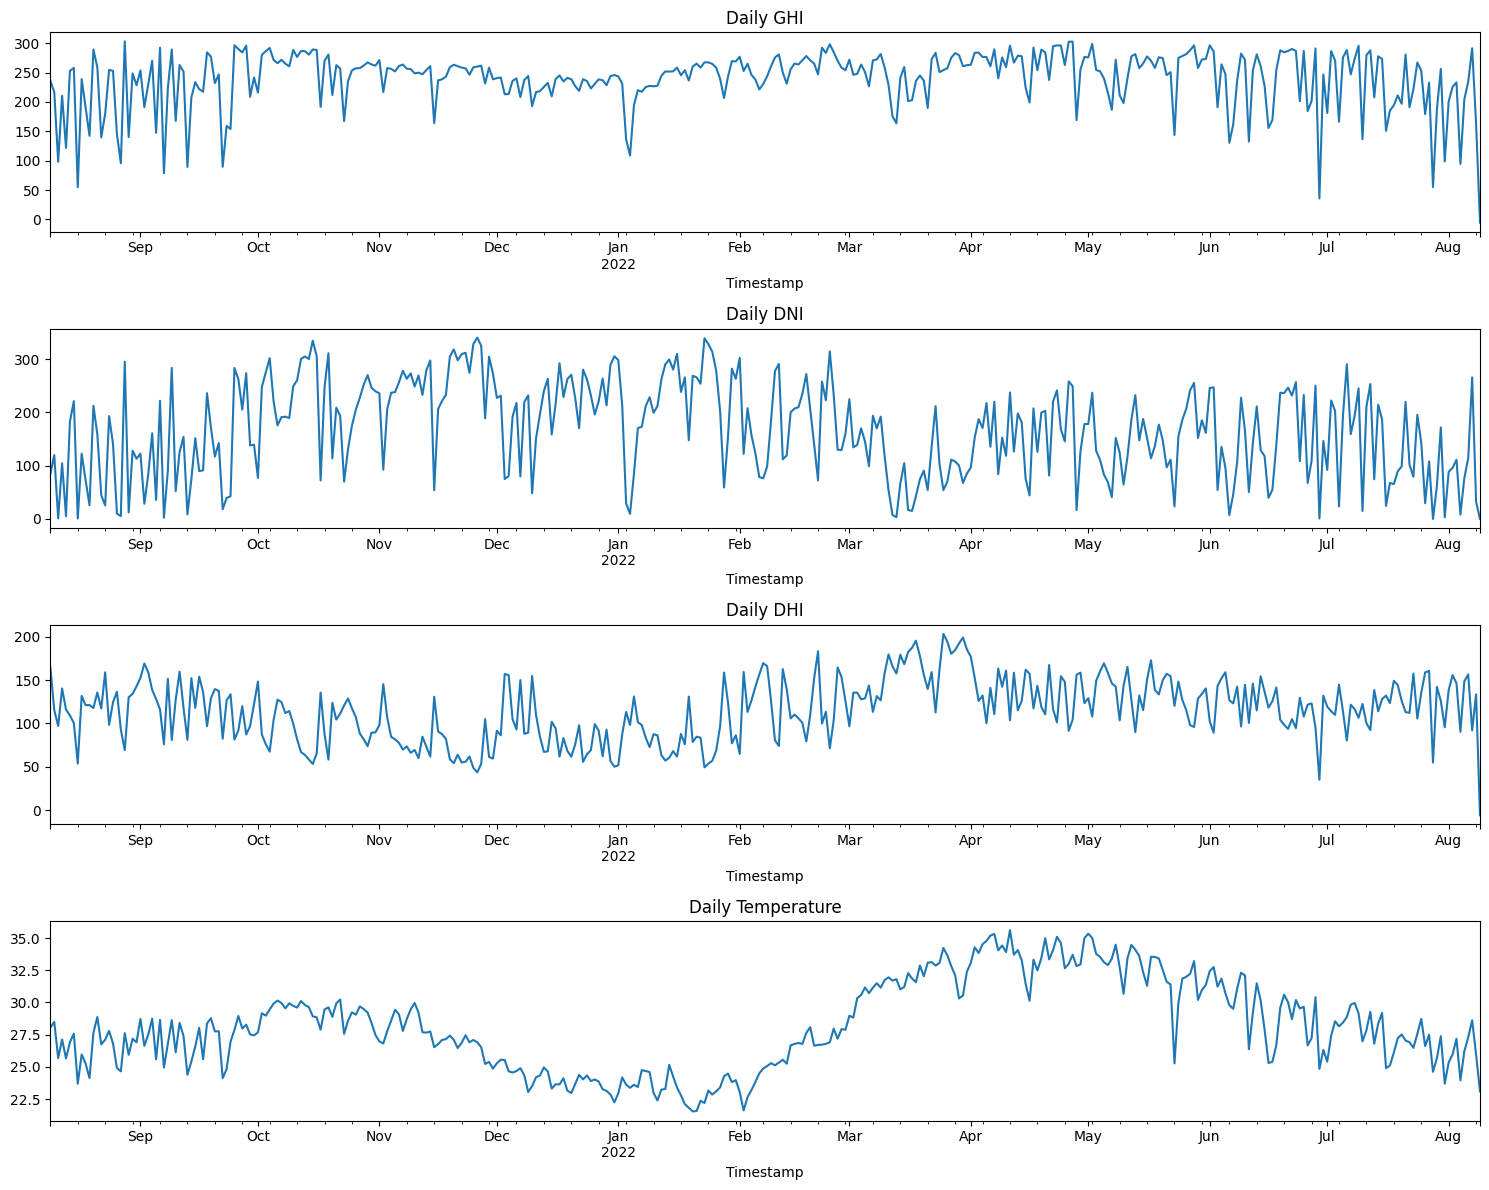

In [20]:
# Daily trends
df.set_index('Timestamp', inplace=True)
fig, ax = plt.subplots(4, 1, figsize=(15, 12))
df['GHI'].resample('D').mean().plot(ax=ax[0], title='Daily GHI')
df['DNI'].resample('D').mean().plot(ax=ax[1], title='Daily DNI')
df['DHI'].resample('D').mean().plot(ax=ax[2], title='Daily DHI')
df['Tamb'].resample('D').mean().plot(ax=ax[3], title='Daily Temperature')
plt.tight_layout()
plt.show()

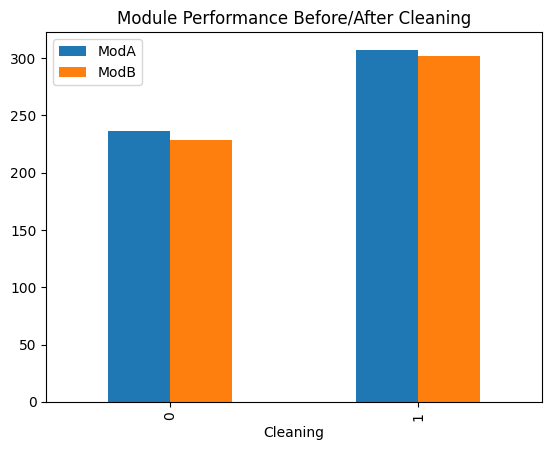

In [21]:
if 'Cleaning' in df.columns:
    clean_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
    clean_impact.plot(kind='bar', title='Module Performance Before/After Cleaning')
    plt.show()

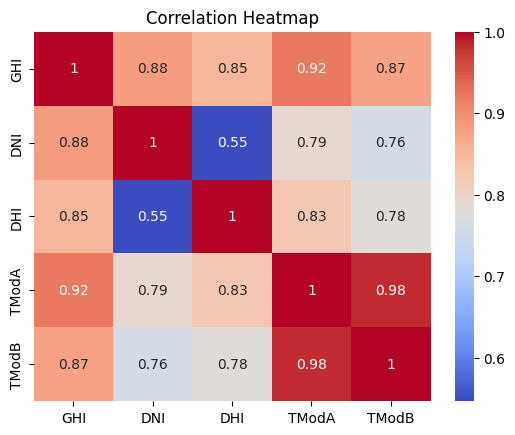

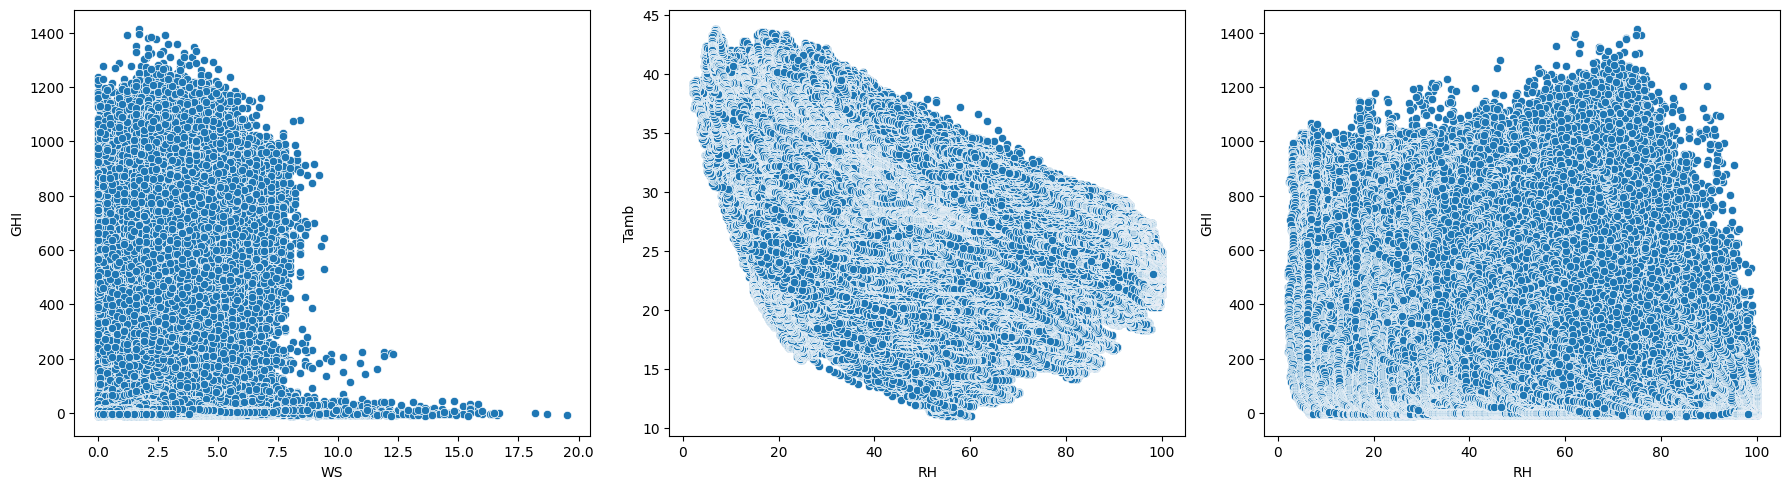

In [22]:
# Heatmap
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x='WS', y='GHI', ax=ax[0])
sns.scatterplot(data=df, x='RH', y='Tamb', ax=ax[1])
sns.scatterplot(data=df, x='RH', y='GHI', ax=ax[2])
plt.tight_layout()
plt.show()

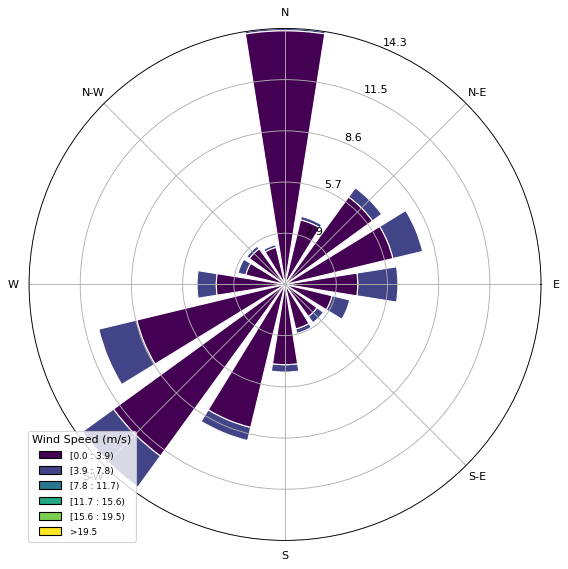

In [23]:
# Wind rose (requires windrose package: pip install windrose)
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'].dropna(), df['WS'].dropna(), normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.show()

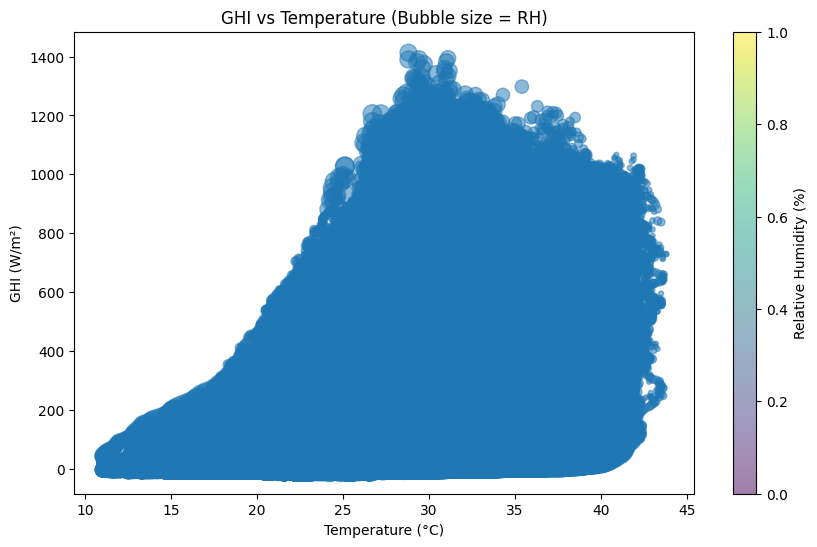

In [24]:
# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*2, alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.show()

In [25]:
# Ensure data directory exists
import os
os.makedirs('data', exist_ok=True)

# Export cleaned data
df.to_csv('data/benin_clean.csv')

In [27]:
# Ensure data directory exists
import os
os.makedirs('data', exist_ok=True)

# Export cleaned data

df.to_csv(r'C:\10x AIMastery\solar-challenge-week1\data\benin_clean.csv', index=False)